In [2]:
import pandas as pd 
import os as os 
import seaborn as sb
import matplotlib.pyplot as plt

#Import the file
custdata = pd.read_csv('Customer_Sales.csv')

#Summarize sales by customer
top_customers = custdata.groupby(['customer_id'],as_index=False)['sales'].sum()

#Summarize no.f of days with sales by customer
top_customers_trans = custdata.groupby(['customer_id'],as_index=False)['sales'].count()

#Merge the datasets to get sales and number of days with sales by customers 
top_cust_sales_trans = top_customers.merge(top_customers_trans, how = 'inner', 
                                            left_on = 'customer_id', right_on = 'customer_id',
                                            suffixes=('_dollar','_days_count'))

#Understand the statistics on Sales
top_cust_sales_trans['sales_dollar'].hist(bins=100)
top_cust_sales_trans['sales_dollar'].describe()

count     1000.000000
mean      2358.054870
std       5048.893248
min          0.000000
25%        132.722500
50%        621.285000
75%       2534.822500
max      71361.130000
Name: sales_dollar, dtype: float64

count    1000.000000
mean       36.797000
std        57.085449
min         1.000000
25%         3.000000
50%        12.000000
75%        47.000000
max       487.000000
Name: sales_days_count, dtype: float64

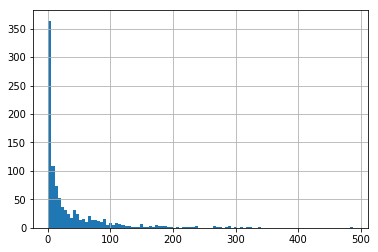

In [4]:
#Understand the statistics on days with sales by customer 
top_cust_sales_trans['sales_days_count'].hist(bins=100)
top_cust_sales_trans['sales_days_count'].describe()

count     1000.000000
mean       617.111467
std       1290.521377
min          1.122500
25%         36.657500
50%        164.321250
75%        674.998750
max      17846.282500
Name: modif_value, dtype: float64

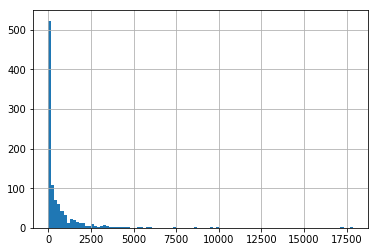

In [5]:
"""Creating a new variable with 25% weightage to sales and 75% weightage to days with sales to account for any abnormal 
purchases. Abnormal purchases could be due fraud or legitimate. I belive the best customers are the ones who make frequent
purcases"""

top_cust_sales_trans['modif_value'] = (top_cust_sales_trans['sales_dollar']*0.25) + (top_cust_sales_trans['sales_days_count'] * 0.75)
top_cust_sales_trans['modif_value'].hist(bins=100)
top_cust_sales_trans['modif_value'].describe()


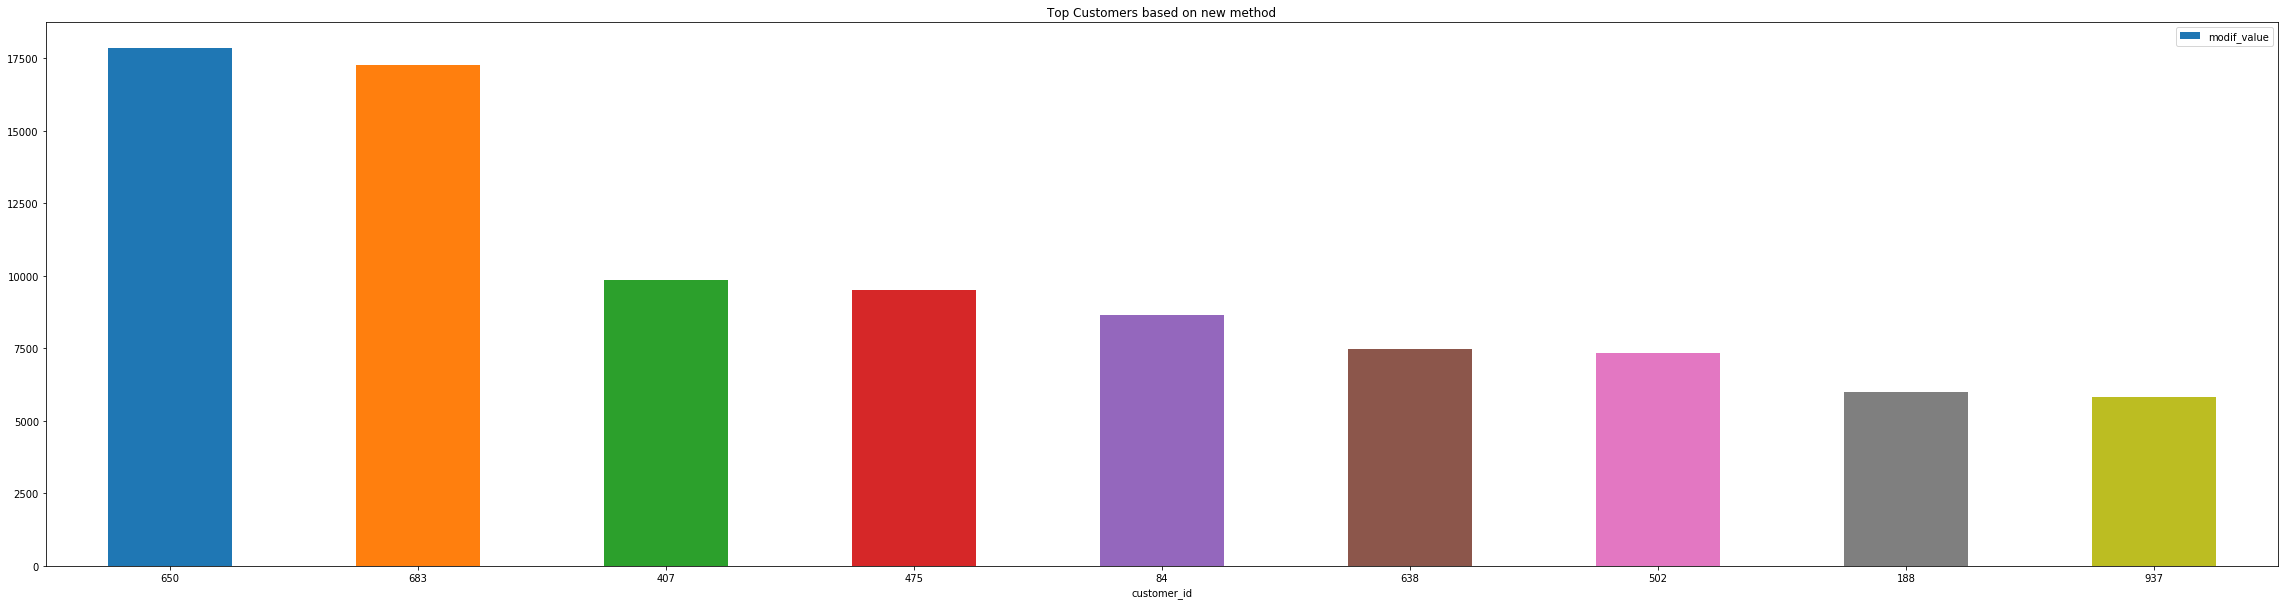

In [17]:
#Sort the data frame by the newly created field 

top_sort = top_cust_sales_trans.sort_values(by = ['modif_value'], ascending=False, inplace=False)
#Pick the top 10 customers
top_sort = top_sort.iloc[0:9,]

#Bar chart with customer id and the newly created modified value to pick the top customers 
top_sort.plot.bar(x='customer_id', y='modif_value', rot=0)
plt.title('Top Customers based on new method')
plt.show()

C:\Users\chaithanyayatham\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\chaithanyayatham\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\chaithanyayatham\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pa

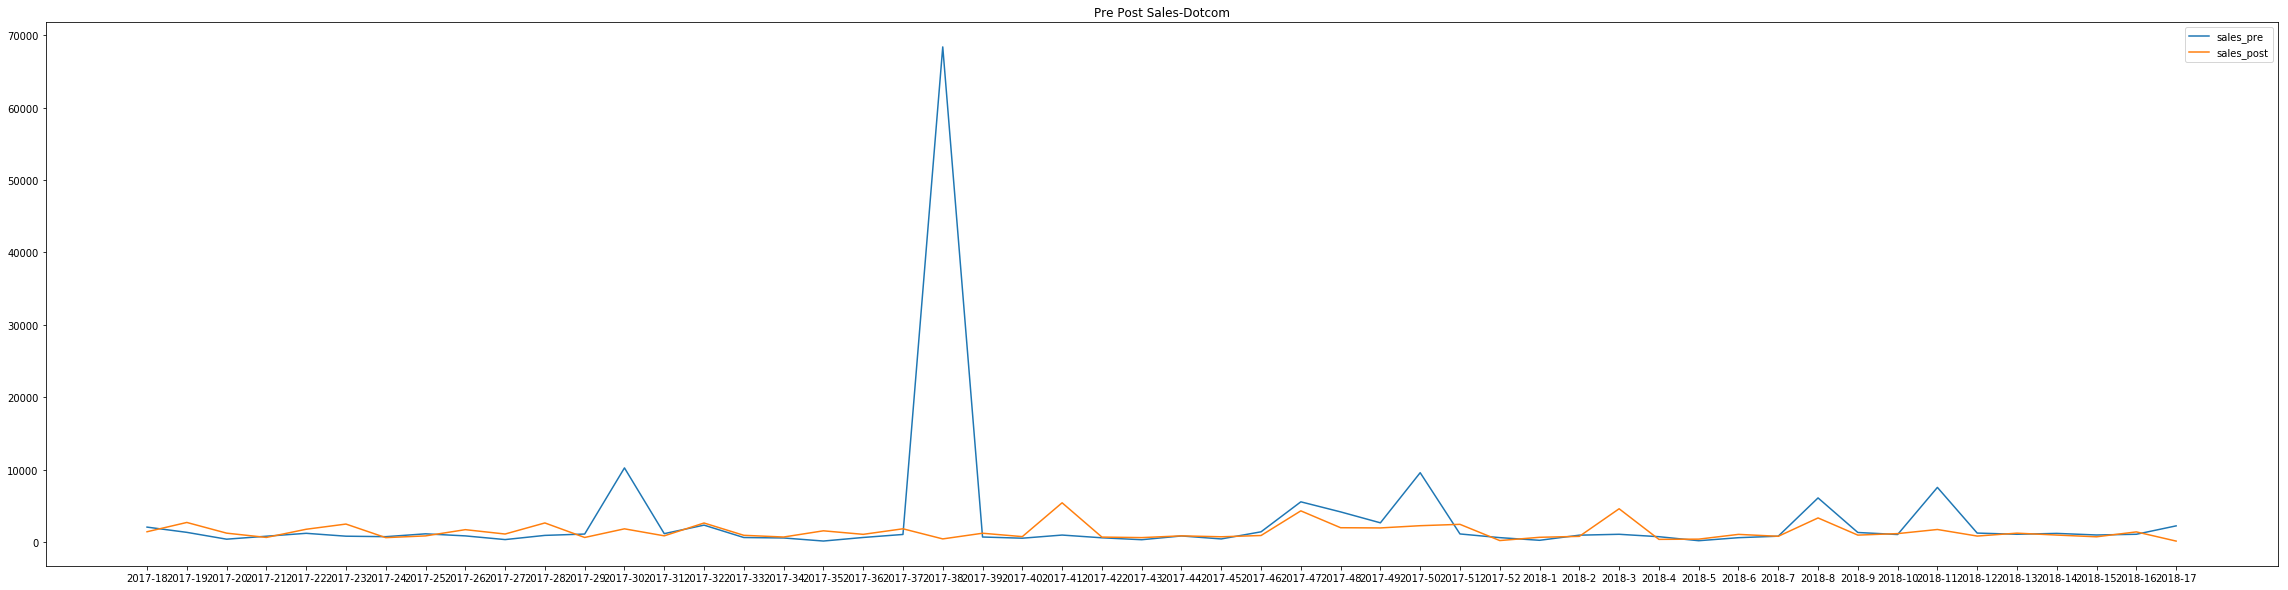

In [11]:
#Split the data for DOTCOM and OG into 2 Data Frames
cust_dotcom = custdata[custdata['shopping_medium'] == 'DOTCOM']
cust_og =  custdata[custdata['shopping_medium'] == 'OG']

#Transfer the date field to pandas date time field
cust_dotcom['order_date_new'] = pd.to_datetime(cust_dotcom['order_date'])
#Create a feild with the year from the date
cust_dotcom['order_year'] = pd.DatetimeIndex(cust_dotcom['order_date_new']).year
#Create a feild with the week from the date
cust_dotcom['order_week'] = pd.DatetimeIndex(cust_dotcom['order_date_new']).week

#Transfer the date field to pandas date time field
cust_og['order_date_new'] = pd.to_datetime(cust_og['order_date'])
#Create a feild with the year from the date
cust_og['order_year'] = pd.DatetimeIndex(cust_og['order_date_new']).year
#Create a feild with the week from the date
cust_og['order_week'] = pd.DatetimeIndex(cust_og['order_date_new']).week

#summarize sales by year-week combination
cust_dotcom_sum = cust_dotcom.groupby(['order_year','order_week'],as_index=False)['sales'].sum()

#Split the data sets by year
cust_dotcom_sum_2019 = cust_dotcom_sum[cust_dotcom_sum['order_year'] == 2019]
cust_dotcom_sum_2018 = cust_dotcom_sum[cust_dotcom_sum['order_year'] == 2018]
cust_dotcom_sum_2017 = cust_dotcom_sum[cust_dotcom_sum['order_year'] == 2017]

#Sort the data set
cust_dotcom_sum_2019.sort_values(by = ['order_week'], ascending=True, inplace=True)
cust_dotcom_sum_2018.sort_values(by = ['order_week'], ascending=True, inplace=True)
cust_dotcom_sum_2017.sort_values(by = ['order_week'], ascending=True, inplace=True)

#print(cust_dotcom_sum_2017.iloc[0,])
#Split the data set to do a pre post comparison 

pre_dotcom = cust_dotcom_sum_2017
pre_dotcom = pre_dotcom.append(cust_dotcom_sum_2018.iloc[0:17,], ignore_index=True)
post_dotcom = cust_dotcom_sum_2018.iloc[17:51,]
post_dotcom = post_dotcom.append(cust_dotcom_sum_2019, ignore_index=True)

#Join the pre post data sets
pre_post_dotcom = pre_dotcom.join(post_dotcom,  lsuffix='_pre', rsuffix='_post') 

#Chart the pre-post data
pre_post_dotcom['key'] = pre_post_dotcom['order_year_pre'].map(str) + '-' + pre_post_dotcom['order_week_pre'].map(str)
plt.rcParams["figure.figsize"]=40,10
plt.plot(pre_post_dotcom.key, pre_post_dotcom.sales_pre)
plt.plot(pre_post_dotcom.key,pre_post_dotcom.sales_post)
#plt.plot(pre_post.key,(((pre_post.sales_post /  pre_post.sales_pre)-1)*100), 'ro')
plt.legend()
plt.title('Pre Post Sales-Dotcom')
plt.show()


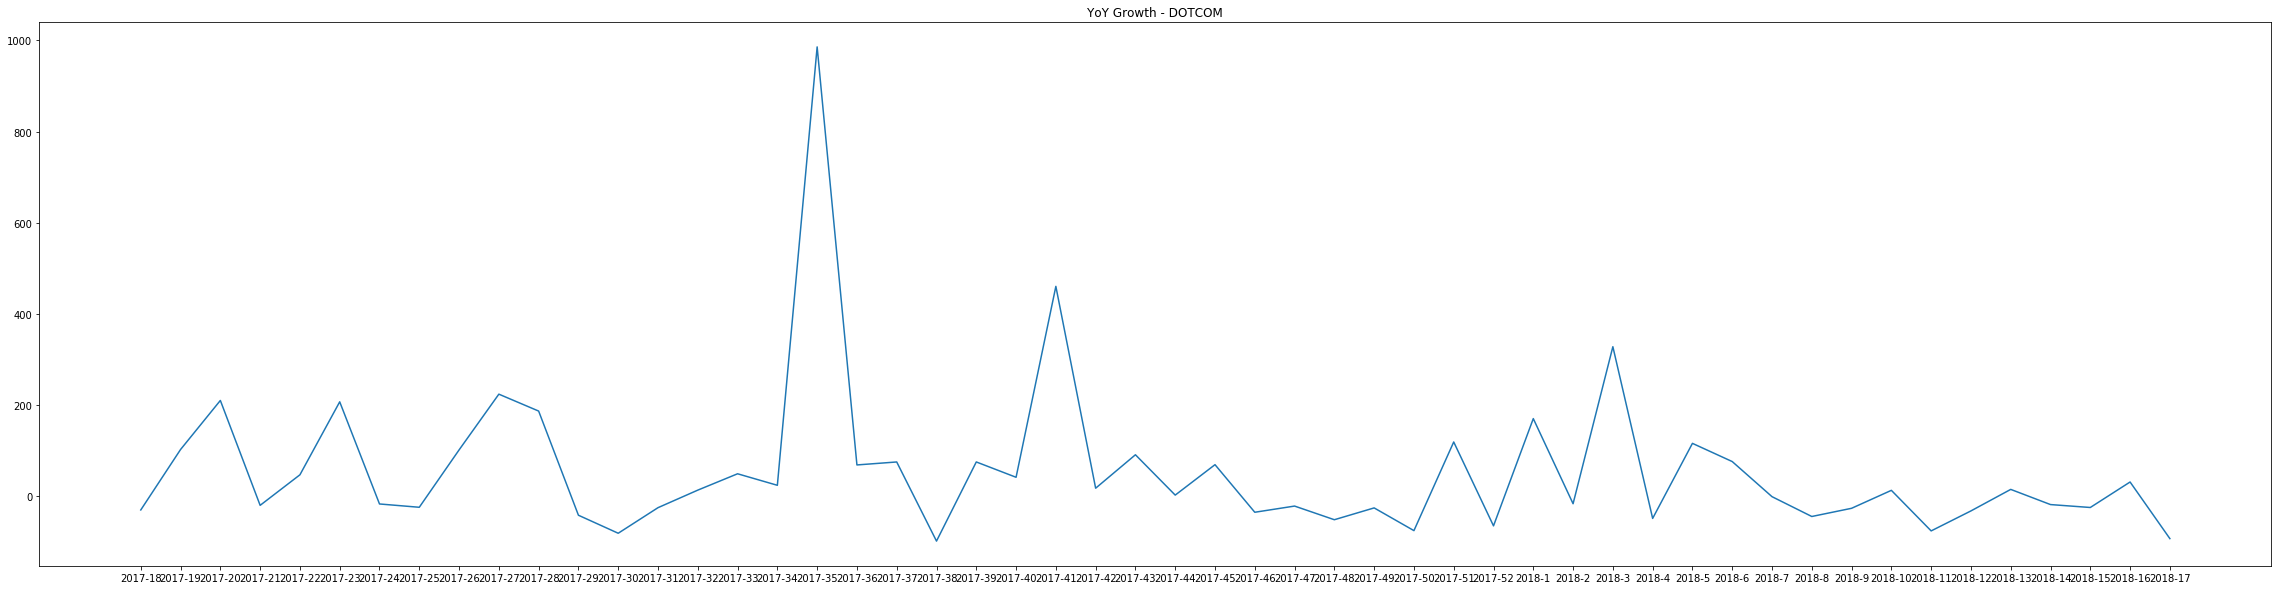

In [12]:
""" this is not a very advanced forecasting technique
    I tried to aggregate data by weeks and then compare the growth of the business for the same weeks across multiple years
    I haven't excluded any outliers
"""
plt.rcParams["figure.figsize"]=40,10
#calculate the year on year growth rate at weekly level
plt.plot(pre_post_dotcom.key,(((pre_post_dotcom.sales_post /  pre_post_dotcom.sales_pre)-1)*100) )
growth = (((pre_post_dotcom.sales_post /  pre_post_dotcom.sales_pre)-1)*100)
plt.title('YoY Growth - DOTCOM')
plt.show()

#Calculate the median growth rate
med_grow_rate = growth.median()


In [148]:
#Forecast the future data
#Multiply post sales with the median growth rate from pre-post
future_weeks_sales_dt = post_dotcom['sales'] * med_grow_rate
#Create data frame with future dates and weeks 
future_week_id = (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
                  ,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)
future_week_yr = (2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
                  2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
                  2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020)
#Create the future data frame
new_df_dt= pd.DataFrame(future_weeks_sales)
new_df_dt['future_week_id'] = future_week_id
new_df_dt['future_week_year'] = future_week_yr
# New_df_dt has the forecast for DOTCOM

C:\Users\chaithanyayatham\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\chaithanyayatham\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\chaithanyayatham\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


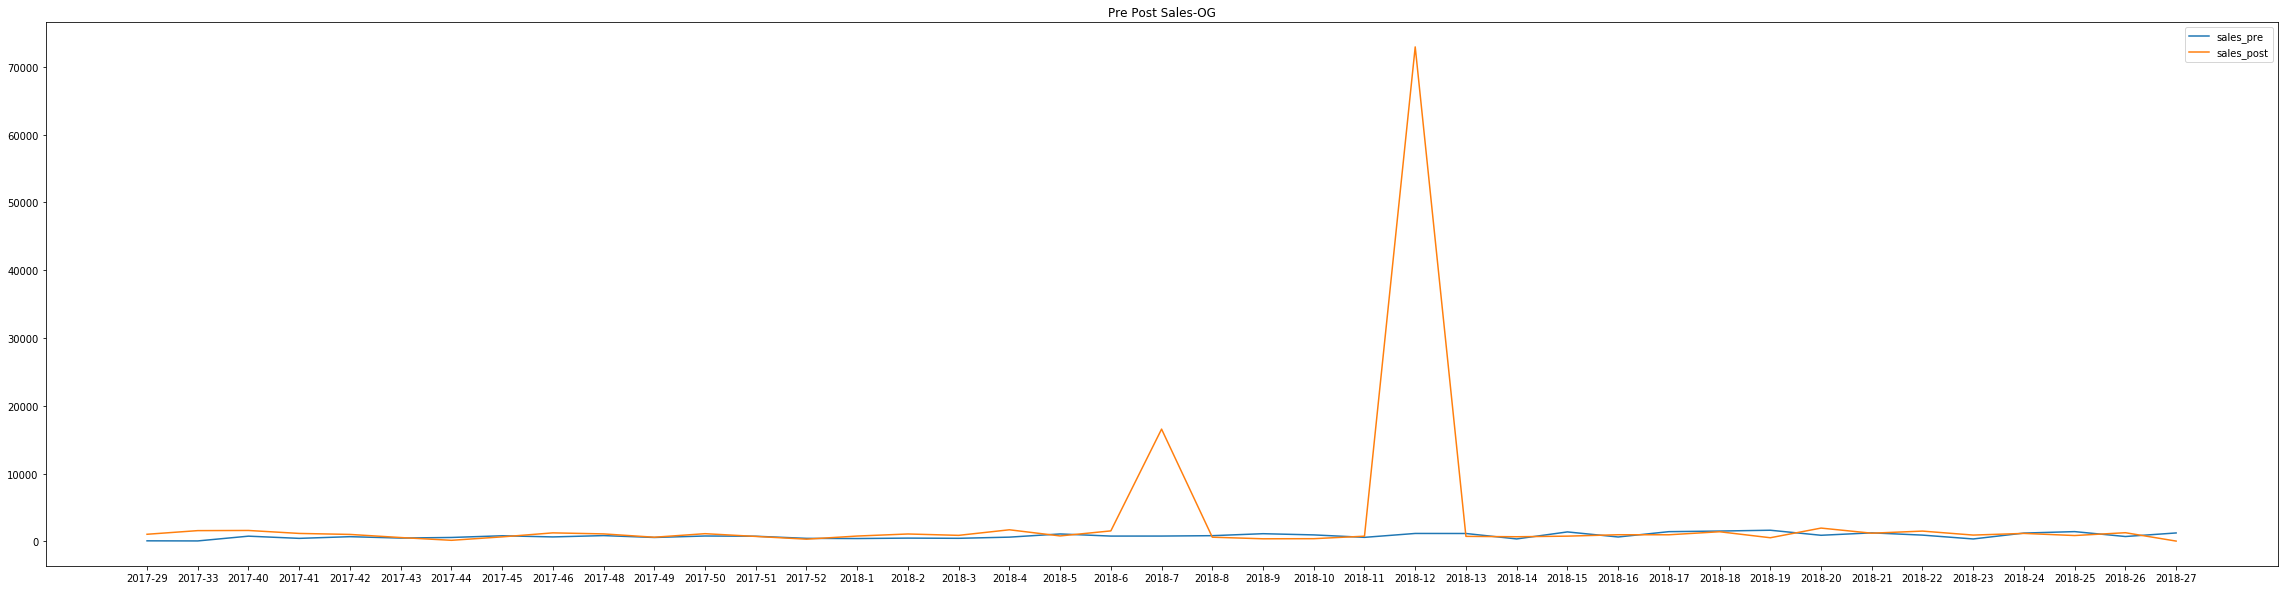

In [13]:
#Repeat the same as above process for Online Grocery
cust_og_sum = cust_og.groupby(['order_year','order_week'],as_index=False)['sales'].sum()

cust_og_sum_2019 = cust_og_sum[cust_og_sum['order_year'] == 2019]
cust_og_sum_2018 = cust_og_sum[cust_og_sum['order_year'] == 2018]
cust_og_sum_2017 = cust_og_sum[cust_og_sum['order_year'] == 2017]


cust_og_sum_2019.sort_values(by = ['order_week'], ascending=True, inplace=True)

cust_og_sum_2018.sort_values(by = ['order_week'], ascending=True, inplace=True)

cust_og_sum_2017.sort_values(by = ['order_week'], ascending=True, inplace=True)

pre_og = cust_og_sum_2017

pre_og = pre_og.append(cust_og_sum_2018.iloc[0:27,], ignore_index=True)

post_og = cust_og_sum_2018.iloc[28:51,]
post_og = post_og.append(cust_og_sum_2019, ignore_index=True)

pre_post_og = pre_og.join(post_og,  lsuffix='_pre', rsuffix='_post') 


pre_post_og['key'] = pre_post_og['order_year_pre'].map(str) + '-' + pre_post_og['order_week_pre'].map(str)
plt.rcParams["figure.figsize"]=40,10
plt.plot(pre_post_og.key, pre_post_og.sales_pre)
plt.plot(pre_post_og.key,pre_post_og.sales_post)

plt.legend()
plt.title('Pre Post Sales-OG')
plt.show()


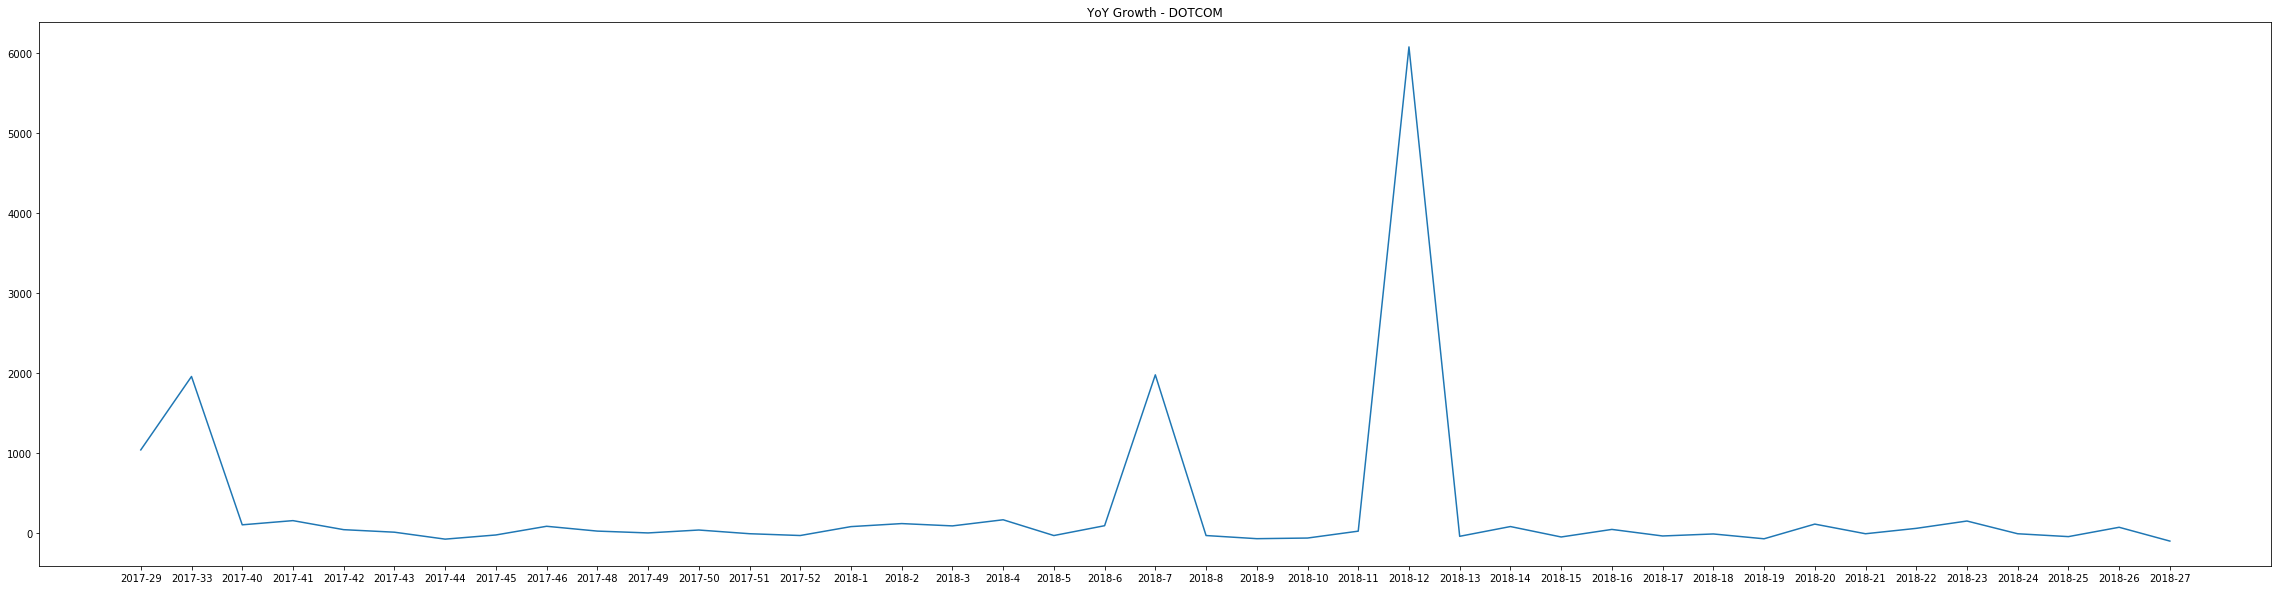

In [18]:
plt.rcParams["figure.figsize"]=40,10
plt.plot(pre_post_og.key,(((pre_post_og.sales_post /  pre_post_og.sales_pre)-1)*100) )
growth_og = (((pre_post_og.sales_post /  pre_post_og.sales_pre)-1)*100)
plt.title('YoY Growth - DOTCOM')
plt.show()

med_grow_rate_og = growth_og.median()


In [20]:
future_weeks_sales_og = post_og['sales'] * med_grow_rate_og
future_weeks_v1 = pre_og.iloc[30:43,]
future_weeks_pre = future_weeks_v1['sales'] * med_grow_rate_og
future_weeks_pre_post = future_weeks_pre.append(future_weeks_sales_og, ignore_index=True)

future_week_id = (18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
                  ,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)
future_week_yr = (2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
                 2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
                 2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020)
#Create the future data frame
#print(future_weeks_pre_post.shape)
new_df_og= pd.DataFrame(future_weeks_pre_post)
new_df_og['future_week_id'] = future_week_id
new_df_og['future_week_year'] = future_week_yr
# new_df_og has the forecast for the future weeks for Online Grocery